In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.special import factorial
import math
# import csv
from matplotlib import rc, rcParams

In [12]:
with open('curr_for_diff_voltages.csv', mode ='r') as file:
    lines = file.readlines()
    
freqs = [float(value.split("±")[0]) for value in lines[0].split(",")[1:] if value.strip()]
## all uncertainties are 2 nm

print(lines)
print(freqs)

rest = [line.split(",") for line in lines[1:]]
volt_currs = [(float(values[0]), [(float(value.split("±")[0]), float(value.split("±")[1])) for value in values[1:] if value.strip()]) for values in rest]
print(volt_currs)

['voltage (+/- 0.02V),365 ± 2,404.7,435.8,546.1,577,,,\n', '0,0.6425 ± 0.0005,0.1735 ± 0.0005,0.2228 ± 0.0004,0.0008 ± 0.0002,0.0027 ± 0.0005,,,\n', '0.1,0.5454 ± 0.0005,0.1383 ± 0.0005,0.1596 ± 0.0004,-0.0016 ± 0.0003,0 ± 0.0003,,,\n', '0.2,0.4556 ± 0.0005,0.1020 ± 0.0005,0.0966 ± 0.0003,-0.0043 ± 0.0002,-0.0021 ± 0.0002,,,\n', '0.3,0.3625 ± 0.0003,0.0672 ± 0.0002,0.0519 ± 0.0003,-0.00565 ± 0.0003,-0.0042 ± 0.0002,,,\n', '0.4,0.2857 ± 0.0003,0.0431 ± 0.0005,0.00185 ± 0.0005,-0.0074 ± 0.0005,-0.0058 ± 0.0005,,,\n', '0.5,0.2140 ± 0.0005,0.0215 ± 0.0003,-0.0007 ± 0.0002,,,,,\n', '0.6,0.1479 ± 0.0004,0.0055 ± 0.0003,-0.0083 ± 0.0004,,,,,\n', '0.7,0.0978 ± 0.0005,-0.0027 ± 0.0005,-0.0099 ± 0.0004,,,,,\n', '0.8,0.0531 ± 0.0005,-0.0060 ± 0.0004,,,,,,\n', '0.9,0.0222 ± 0.0005,-0.0066 ± 0.0003,,,,,,\n', '1,0.00388 ± 0.0002,,,,,,,\n', '1.1,-0.00421 ± 0.0004,']
[365.0, 404.7, 435.8, 546.1, 577.0]
[(0.0, [(0.6425, 0.0005), (0.1735, 0.0005), (0.2228, 0.0004), (0.0008, 0.0002), (0.0027, 0.0005)]), 

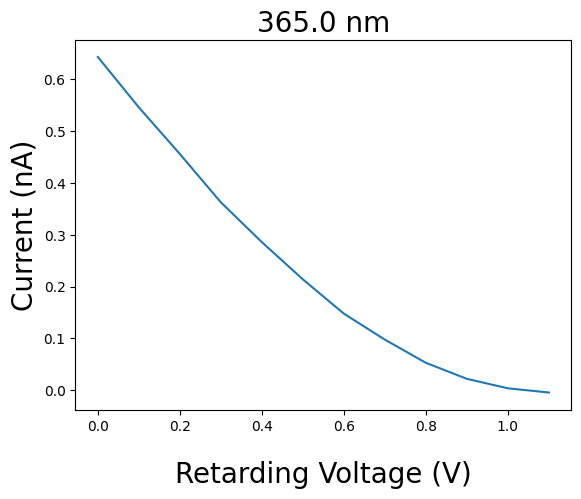

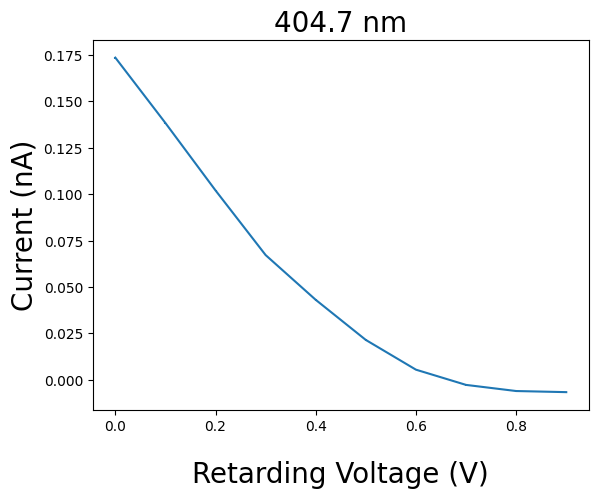

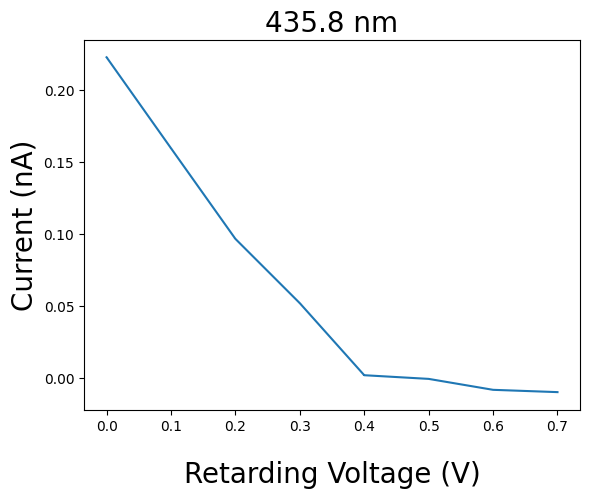

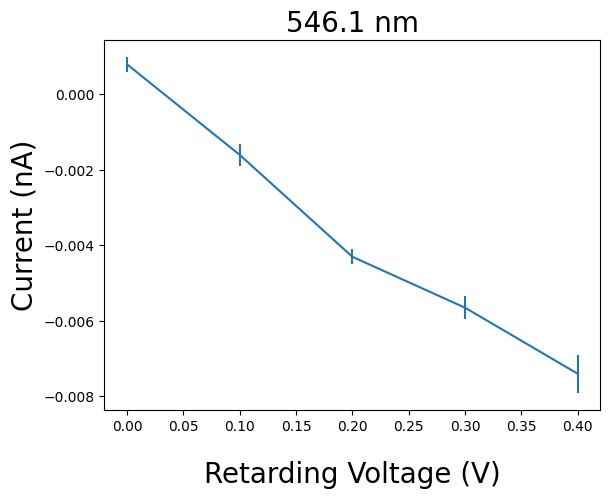

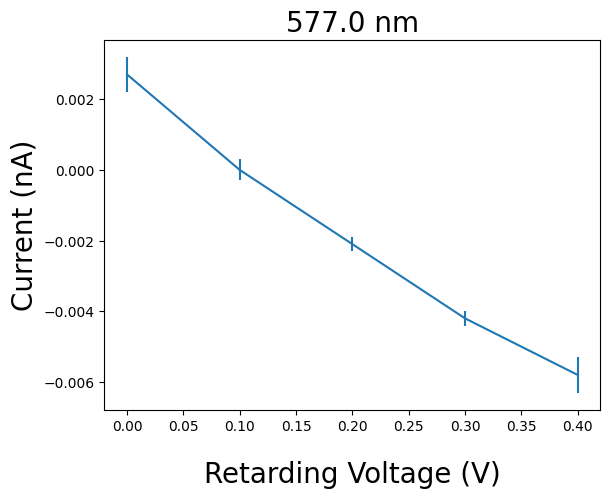

In [65]:
mins = []
minerrs = []
for freq_ind in range(len(freqs)):
    xs = [volt for volt, currs in volt_currs if len(currs) > freq_ind]
    ys = [currs[freq_ind][0] for volt, currs in volt_currs if len(currs) > freq_ind]
    errs = [currs[freq_ind][1] for volt, currs in volt_currs if len(currs) > freq_ind]
    mine = min(ys)
    mins += [mine]
    minerrs += [errs[ys.index(mine)]]

    # plt.plot(xs, ys)
    plt.errorbar(xs, ys, yerr=errs)

    plt.title(f'{freqs[freq_ind]} nm', fontsize=20)
    plt.xlabel(r'Retarding Voltage (V)', fontsize=20, labelpad=20)
    plt.ylabel(r'Current (nA)', fontsize=20)
    plt.show()

Text(0, 0.5, 'Least Observed Current (nA)')

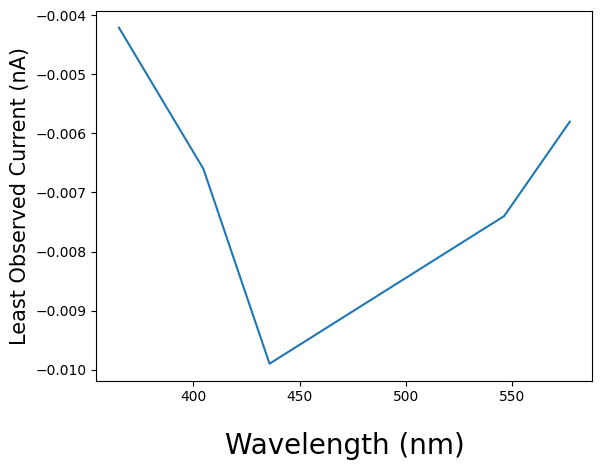

In [57]:
plt.plot(freqs, mins)
plt.xlabel(r'Wavelength (nm)', fontsize=20, labelpad=20)
plt.ylabel(r'Least Observed Current (nA)', fontsize=15)

In [58]:
import numpy as np

def fitlin(x, y, sig):
    '''
    Performs a least-squares linear fit

    Parameters
    ----------
    x : array
        The independent data
    y : array
        The dependent data
    sig : array
        The uncertainty in y

    Returns
    ----------
    popt : array
        Optimal values for the parameters
    perr : array
        The uncertainty on the fit parameters
    chisq : float
        The value of chi-squared
    yfit : array
        The values of the fitted line at each x
    '''

    ### See Bevington and Robinson Ch. 6 (p. 114)

    # TLDR: by minimizing the chi-squared, you get a system of equations
    ###         term3 = b * term1 + m * term5
    ###         term4 = b * term5 + m * term2
    ###     this equation can be solved by taking determinants
    ###     the inverse of the matrix (the curvature matrix of a linear ftn)
    ###         ( term1 term5 )
    ###         ( term5 term2 )
    ###     is the covariance matrix, and the diagonal terms are the fit errors
    ###     the full formulas can be found on page 114 of Bevington

    term1 = np.sum(    1 / sig**2 )
    term2 = np.sum( x**2 / sig**2 )
    term3 = np.sum(    y / sig**2 )
    term4 = np.sum(  x*y / sig**2 )
    term5 = np.sum(    x / sig**2 )

    delta = term1*term2 - term5**2

    b = ( term2*term3 - term5*term4 ) / delta
    m = ( term1*term4 - term5*term3 ) / delta
    popt = np.array([b, m])

    berr = np.sqrt( term2 / delta )
    merr = np.sqrt( term1 / delta )
    perr = np.array([berr, merr])

    yfit = b + m*x

    chisq = np.sum( ( (y - yfit) / sig )**2 )

    return popt, perr, chisq, yfit

In [59]:
freqs = np.array(freqs)
mins = np.array(mins)
minerrs = np.array(minerrs)
popt, perr, chisq, yfit = fitlin(freqs[:3], mins[:3], minerrs[:3])

Text(0, 0.5, 'Least Observed Current (nA)')

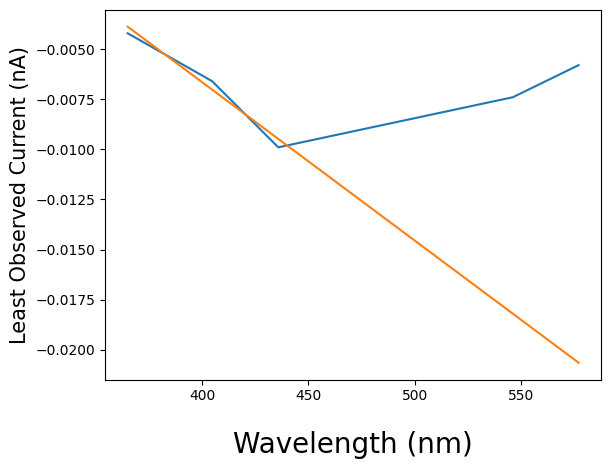

In [60]:
plt.plot(freqs, mins)
plt.plot(freqs, freqs * popt[1] + popt[0])
plt.xlabel(r'Wavelength (nm)', fontsize=20, labelpad=20)
plt.ylabel(r'Least Observed Current (nA)', fontsize=15)


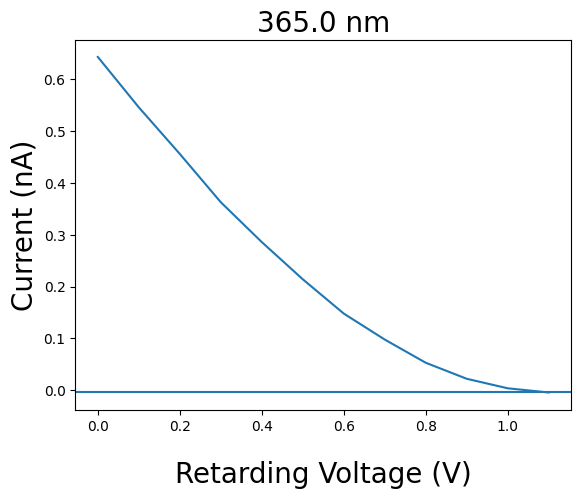

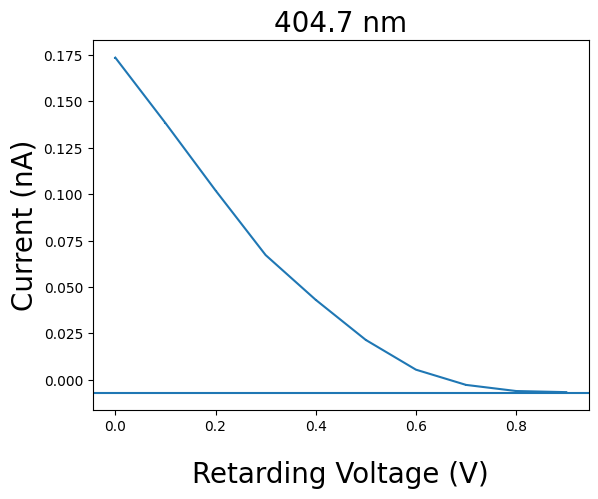

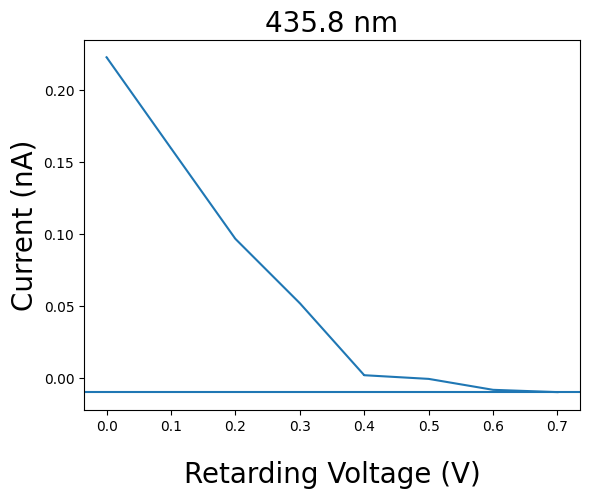

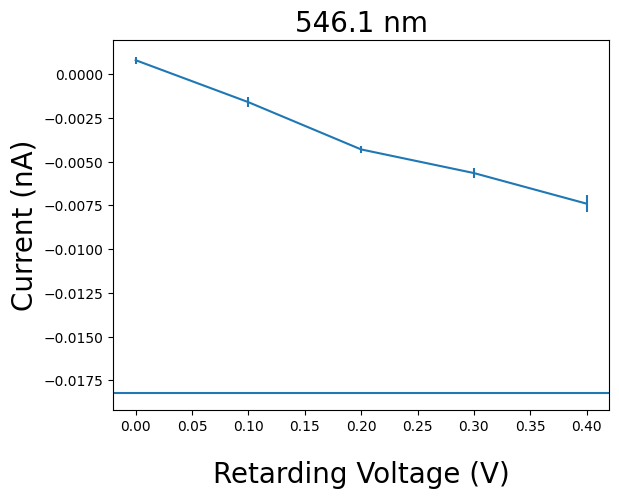

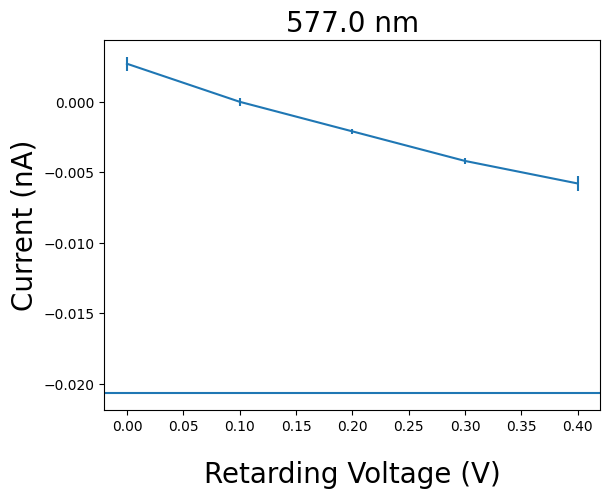

In [61]:
for freq_ind in range(len(freqs)):
    xs = [volt for volt, currs in volt_currs if len(currs) > freq_ind]
    ys = [currs[freq_ind][0] for volt, currs in volt_currs if len(currs) > freq_ind]
    errs = [currs[freq_ind][1] for volt, currs in volt_currs if len(currs) > freq_ind]

    # plt.plot(xs, ys)
    plt.errorbar(xs, ys, yerr=errs)

    plt.title(f'{freqs[freq_ind]} nm', fontsize=20)
    plt.xlabel(r'Retarding Voltage (V)', fontsize=20, labelpad=20)
    plt.ylabel(r'Current (nA)', fontsize=20)
    plt.axhline(y=freqs[freq_ind] * ( popt[1]) + popt[0])
    plt.show()

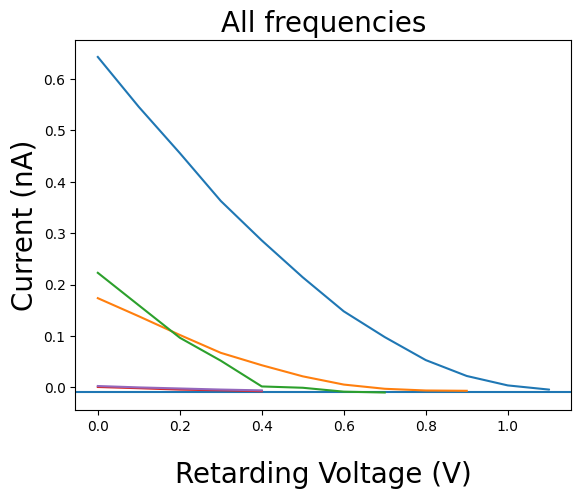

In [62]:
for freq_ind in range(len(freqs)):
    xs = [volt for volt, currs in volt_currs if len(currs) > freq_ind]
    ys = [currs[freq_ind][0] for volt, currs in volt_currs if len(currs) > freq_ind]
    errs = [currs[freq_ind][1] for volt, currs in volt_currs if len(currs) > freq_ind]

    # plt.plot(xs, ys)
    plt.errorbar(xs, ys, yerr=errs)

    plt.title(f'All frequencies', fontsize=20)
    plt.xlabel(r'Retarding Voltage (V)', fontsize=20, labelpad=20)
    plt.ylabel(r'Current (nA)', fontsize=20)
    # plt.axhline(y=freqs[freq_ind] * ( popt[1]) + popt[0])
    # plt.show()

# plt.axhline(y=sum(mins)/len(mins))
plt.axhline(y=min(mins))

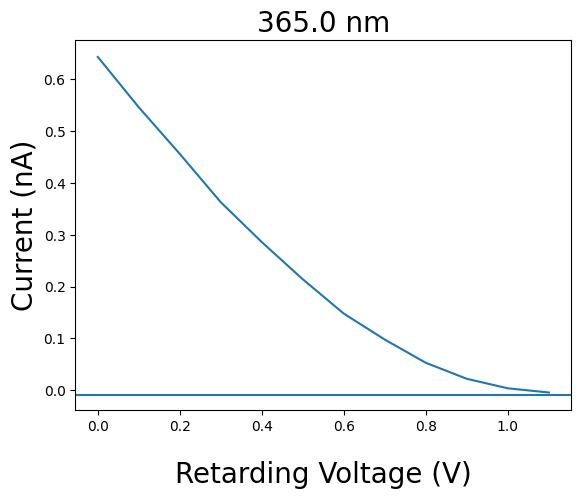

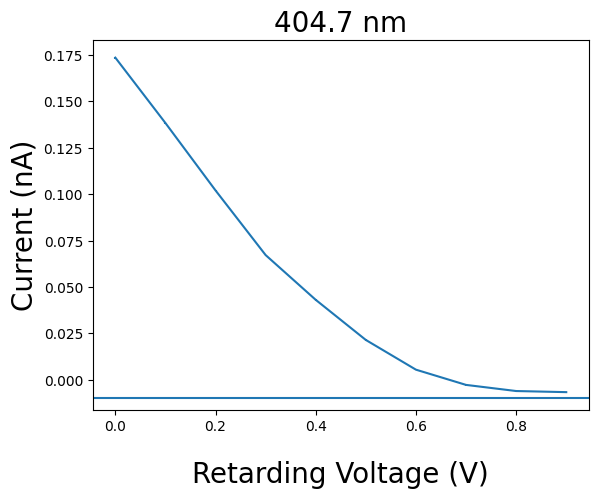

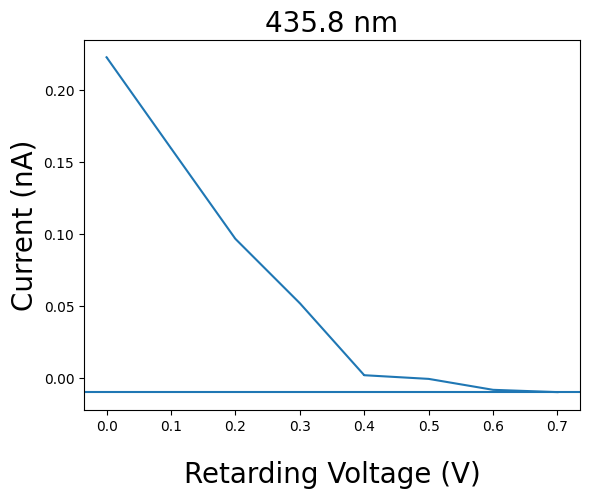

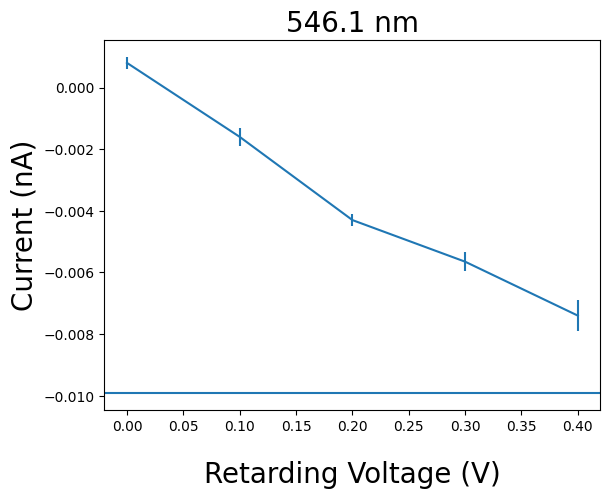

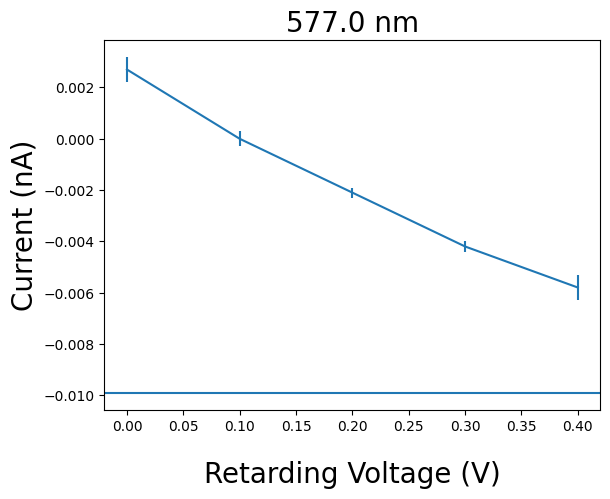

In [69]:
for freq_ind in range(len(freqs)):
    xs = [volt for volt, currs in volt_currs if len(currs) > freq_ind]
    ys = [currs[freq_ind][0] for volt, currs in volt_currs if len(currs) > freq_ind]
    errs = [currs[freq_ind][1] for volt, currs in volt_currs if len(currs) > freq_ind]

    # plt.plot(xs, ys)
    plt.errorbar(xs, ys, yerr=errs)

    plt.title(f'{freqs[freq_ind]} nm', fontsize=20)
    plt.xlabel(r'Retarding Voltage (V)', fontsize=20, labelpad=20)
    plt.ylabel(r'Current (nA)', fontsize=20)
    plt.axhline(y=min(mins))
    # plt.axhline(y=sum(mins)/len(mins))
    plt.show()

cutoff voltage 0.6968253968253961


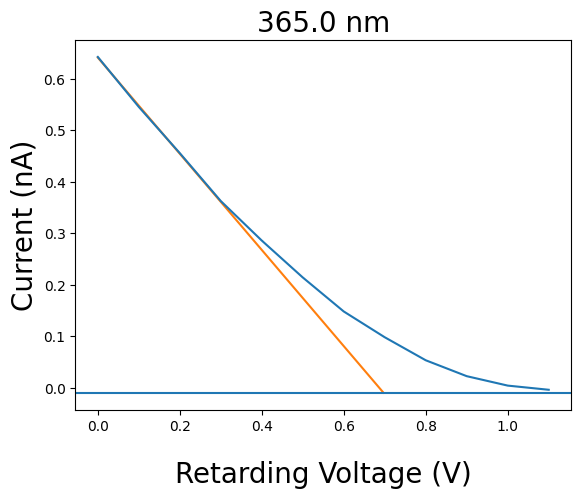

cutoff voltage 0.5135198135198131


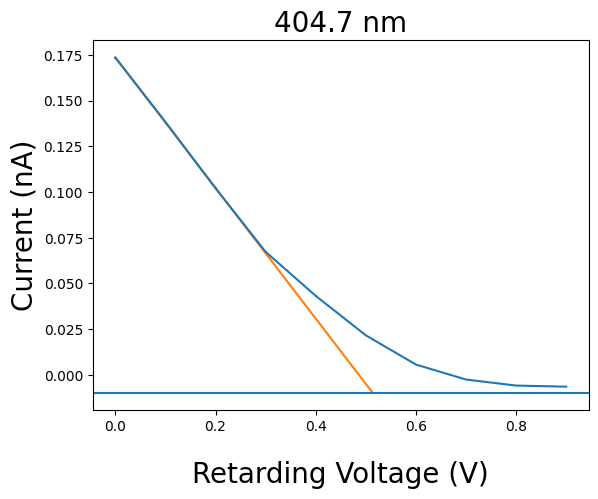

cutoff voltage 0.36876869924490685


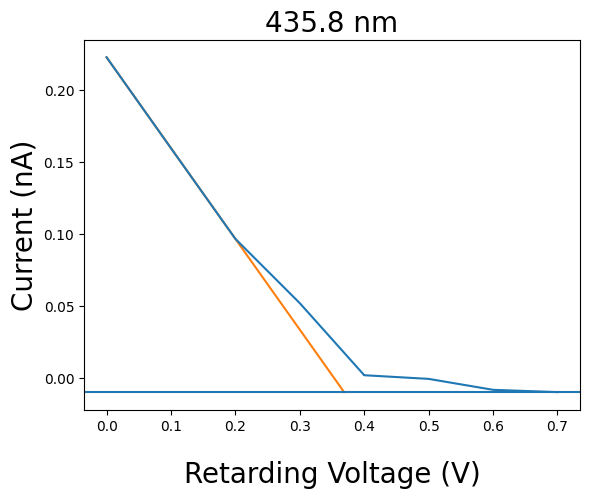

cutoff voltage 0.4771093897479709


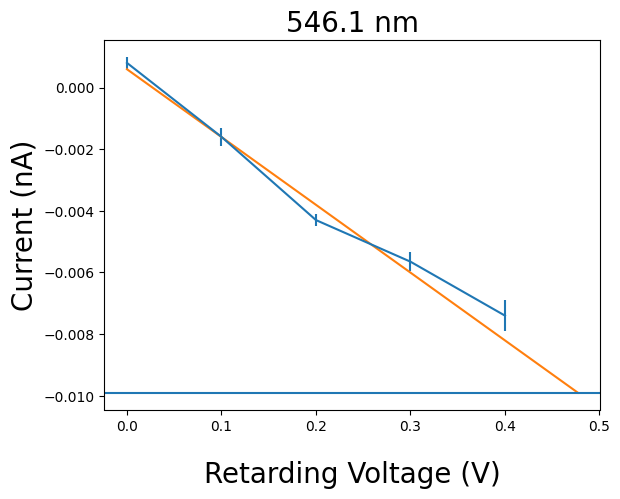

cutoff voltage 0.570162038243109


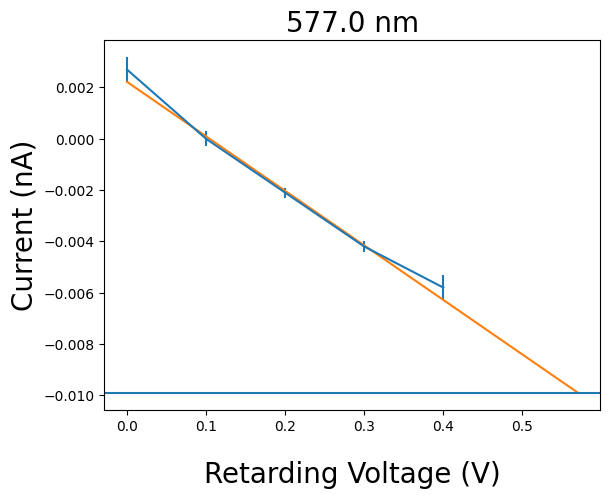

In [82]:
linear_reach_min_of_mins = []
reach_personal_min = []

for freq_ind in range(len(freqs)):
    xs = [volt for volt, currs in volt_currs if len(currs) > freq_ind]
    ys = [currs[freq_ind][0] for volt, currs in volt_currs if len(currs) > freq_ind]
    errs = [currs[freq_ind][1] for volt, currs in volt_currs if len(currs) > freq_ind]

    # plt.plot(xs, ys)
    plt.errorbar(xs, ys, yerr=errs)

    if freq_ind < 3:
        xs = xs[:3]
        ys = ys[:3]
        errs = errs[:3]

    xs = np.array(xs)
    ys = np.array(ys)
    errs = np.array(errs)
    popt, perr, chisq, yfit = fitlin(xs, ys, errs)
    cutoff = (min(mins) - popt[0]) / popt[1]
    pxs = np.append(xs, cutoff)
    plt.plot(pxs, pxs * popt[1] + popt[0])
    linear_reach_min_of_mins += [cutoff]
    print("cutoff voltage", cutoff)

    if freq_ind < 3:
        reach_personal_min += [(min(ys) - popt[0]) / popt[1]]
        plt.axhline(y=min(ys))
    else:
        reach_personal_min += [xs[-1]]

    plt.title(f'{freqs[freq_ind]} nm', fontsize=20)
    plt.xlabel(r'Retarding Voltage (V)', fontsize=20, labelpad=20)
    plt.ylabel(r'Current (nA)', fontsize=20)
    plt.axhline(y=min(mins))
    # plt.axhline(y=sum(mins)/len(mins))
    plt.show()

In [84]:
class_zeros = [1.07,0.7125,0.53,0.233,0.3166666667]
print(linear_reach_min_of_mins)
print(reach_personal_min)

[np.float64(0.6968253968253961), np.float64(0.5135198135198131), np.float64(0.36876869924490685), np.float64(0.4771093897479709), np.float64(0.570162038243109)]
[np.float64(0.19869805600142657), np.float64(0.20051282051282038), np.float64(0.1999679441515886), np.float64(0.4), np.float64(0.4)]
